# DS 2010 Final Project - Correlation

## Import Packages

In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Data

In [2]:
final_data = pd.read_csv("Clean_Data/final_data.csv")

correlation_df = final_data.copy().drop(columns=["State","Period","Depression_Score","Anxiety_Score","Mix_Score"])

new_england_df = final_data.copy()[final_data["State"].isin(['MA', 'ME', 'VT', 'NH', 'CT', "RI"])]
new_england_df = new_england_df.drop(columns=["State","Period","Depression_Score","Anxiety_Score","Mix_Score"])

## Correlation

In [3]:
corr = correlation_df.corr()
corr_new_england = new_england_df.corr()

In [4]:
def correlation(corr, name):
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(12, 9), dpi=160)
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(corr, center=0, mask=mask, cmap="coolwarm",
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='g')
    for item in ax.get_xticklabels():
        item.set_rotation(80)
    plt.tight_layout()
    plt.savefig("charts/heatmap_"+name+".png")
    plt.show()

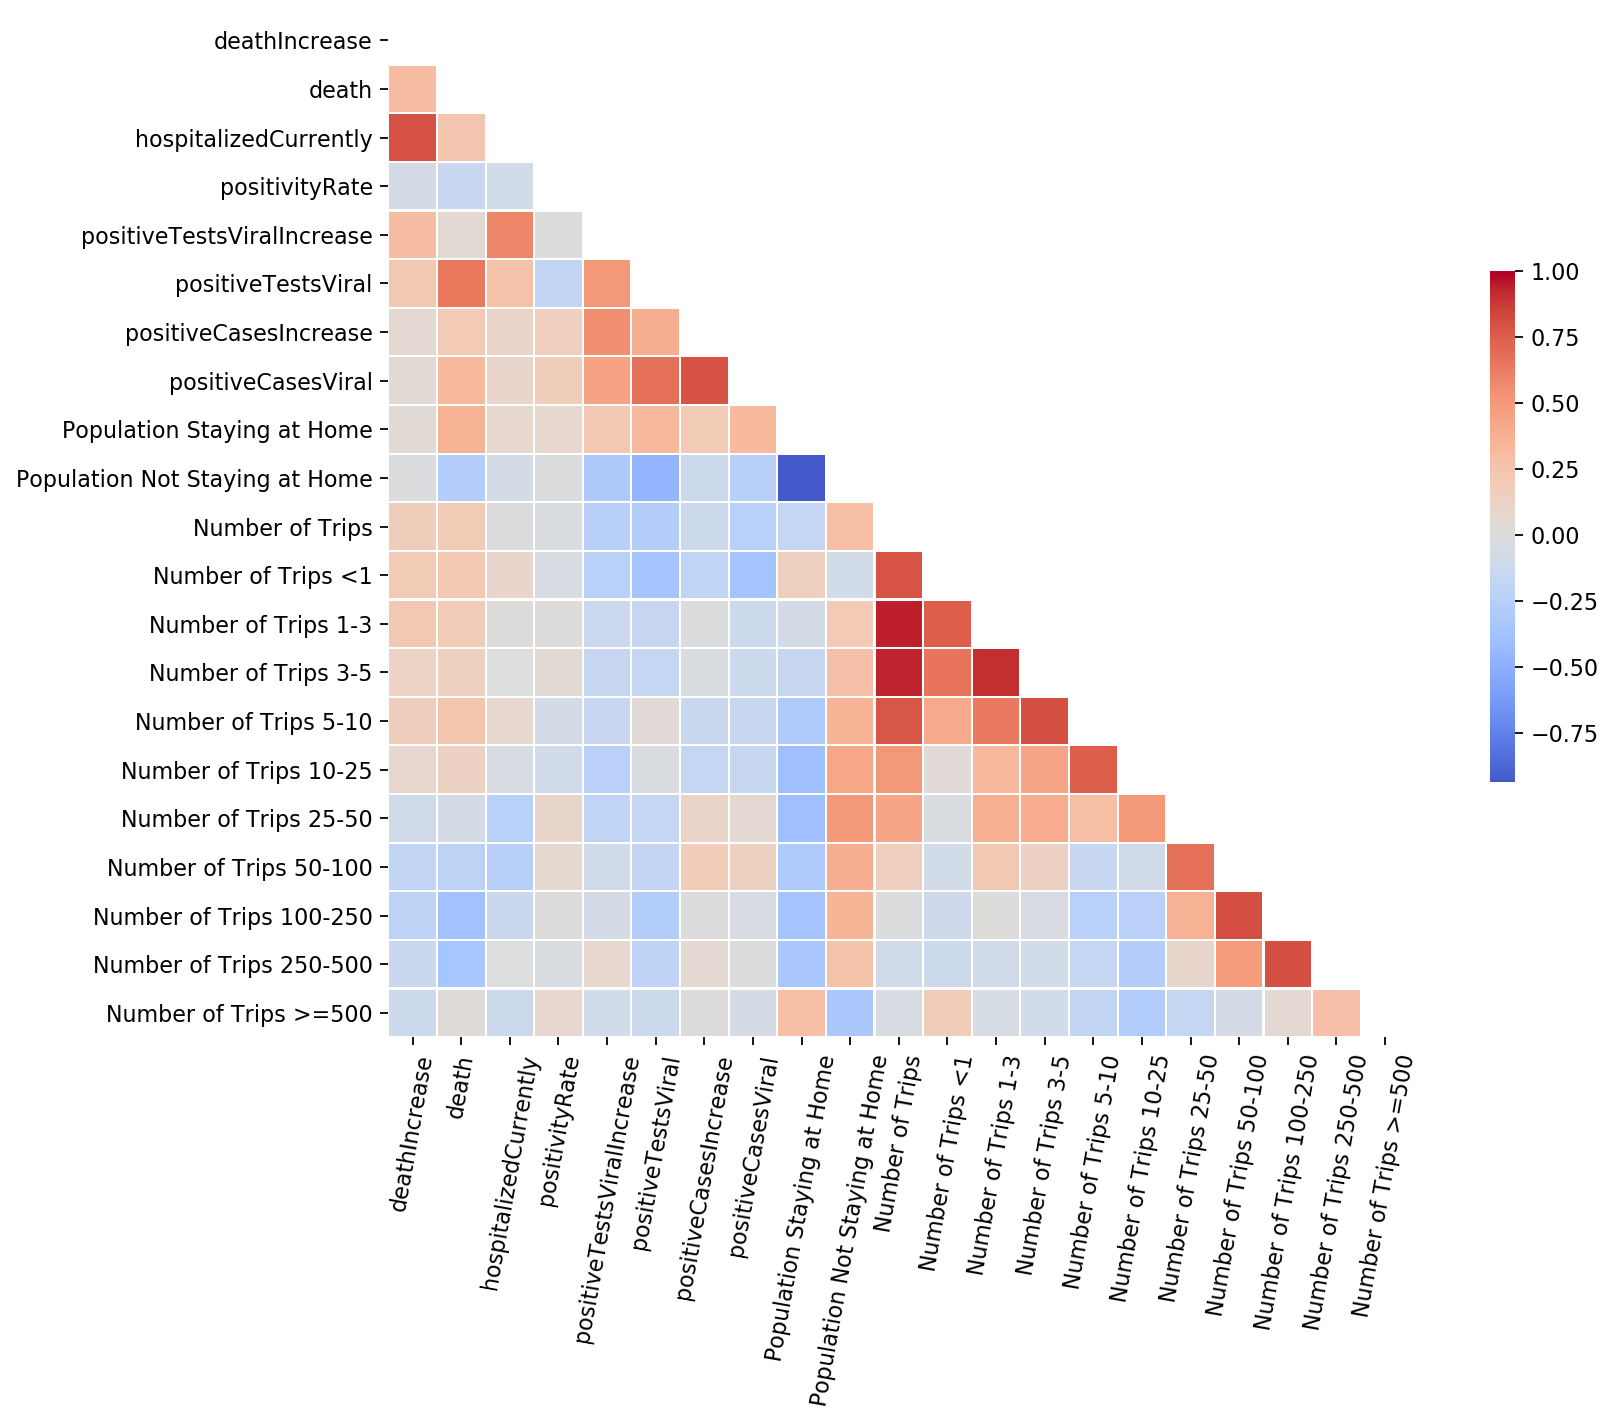

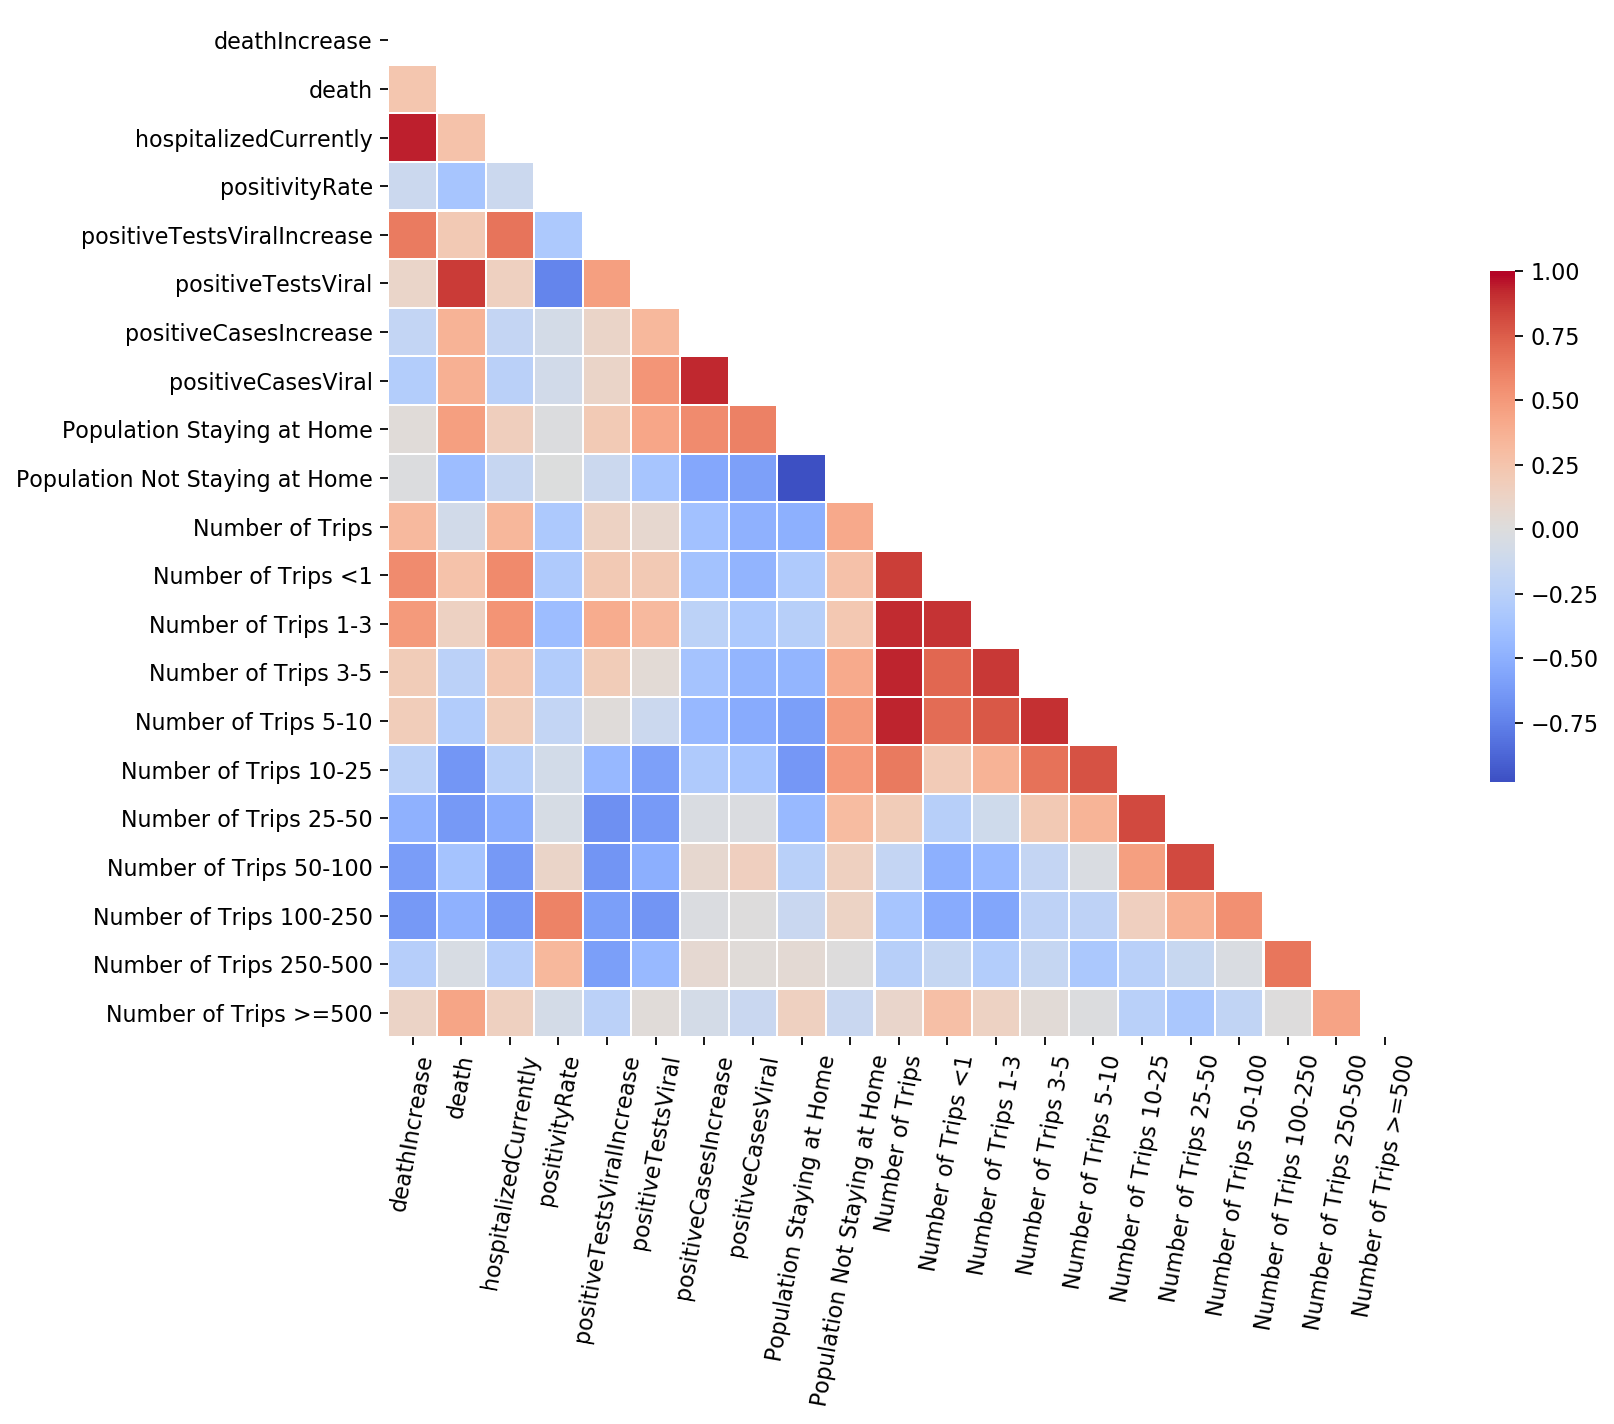

In [5]:
correlation(corr, 'full')
correlation(corr_new_england, 'new_england')